<a href="https://colab.research.google.com/github/redrum88/tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps in modelling with TensorFlow
* Get data ready (turn into tensors)
* Build or pick a pretrained model (to suit your problem)
* Fit the model to the data and make a prediction
* Evaluate the model
* Improve through experimentation
* Save and reload your trained model


# What is regression problem?

Example regression problems
* How much will this house sell for?
* How many people will buy this app?
* How much will my health insurance be?
* How much should i save each week for fuel?




# What we're going to cover
* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model (features and labels)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
  * Fitting a model
  * Evaluating a model
* Different evaluation methods
* Saving and loading models

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.


In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating data to view and fit

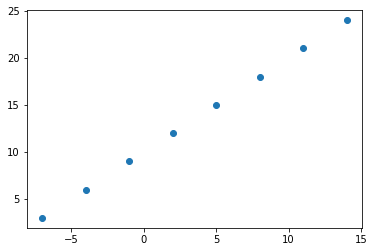

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps i modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our mode).
3.**Fitting a model** - letting the model try to find patters between X & y (features and labels).

In [9]:
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))


model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

model = tf.keras.Sequential
model.add(tf.keras.layers.Dense(1))

TypeError: ignored

In [10]:


# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradien descent
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 866ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
# Turn our NumPy arrays into tensors dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 69ms/step


array([[12.716021]], dtype=float32)

In [14]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [15]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
# Before we trained with `5` epochs and now we'll train with increased epochs then before.

Epoch 1/100
1/1 [==============================] - 0s 371ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 8m

In [16]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Let's see if our model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 54ms/step


array([[29.739855]], dtype=float32)

In [25]:
# Let's try add layer

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics="mae")

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 329ms/step - loss: 12.3469 - mae: 12.3469
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6170 - mae: 11.6170
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8836 - mae: 10.8836
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1465 - mae: 10.1465
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4040 - mae: 9.4040
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.6532 - mae: 8.6532
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.8904 - mae: 7.8904
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1119 - mae: 7.1119
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8174 - mae: 6.8174
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.1412 - mae: 7.1412
Epoch 11/100
1/1 [==============================] - 0s 10ms/step 

In [27]:
# Make prediction
model.predict([17.])

1/1 [==============================] - 0s 25ms/step


array([[26.209414]], dtype=float32)

In [74]:
# Let's see if we can make another to improve our model

# Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 302ms/step - loss: 13.2349 - mae: 13.2349
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6529 - mae: 12.6529
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.0684 - mae: 12.0684
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.4623 - mae: 11.4623
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8279 - mae: 10.8279
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1402 - mae: 10.1402
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.3665 - mae: 9.3665
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.4809 - mae: 8.4809
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4365 - mae: 7.4365
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.2459 - mae: 6.2459
Epoch 11/100
1/1 [==============================] - 0s 7ms/step 

In [75]:
model.predict([17.])

1/1 [==============================] - 0s 55ms/step


array([[30.290323]], dtype=float32)

In [76]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [77]:
# Let's try to make a prediction
model.predict([17.])

1/1 [==============================] - 0s 42ms/step


array([[30.290323]], dtype=float32)

Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```




When it comes to evaluation.. there are 3 words you should memorize:
> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model = how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against  the ground truth (the original labels)?

In [28]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [29]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

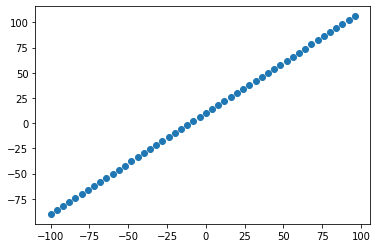

In [31]:
# Visualize the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y);

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 7-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [32]:
# Check the lenght of how many samples we have
len(X)

50

In [34]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

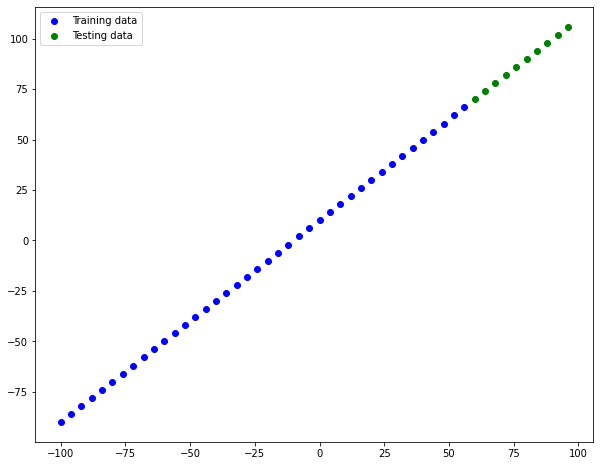

In [35]:
plt.figure(figsize=(10, 8))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [42]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)
#model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 20.6477 - mae: 20.6477
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 9.5278 - mae: 9.5278
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2127 - mae: 11.2127
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6034 - mae: 9.6034
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.5184 - mae: 10.5184
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.7389 - mae: 9.7389
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.8284 - mae: 8.8284
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0662 - mae: 9.0662
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.3971 - mae: 19.3971
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.4734 - mae: 10.4734
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - los

### Visualizing the model

In [44]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [47]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patters) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patters or parameters from other models during **transfer learning**)

📖**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

⚒️**Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [48]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [49]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
